# Topological Global Synchronization

Here we illustrate Topological Global Synchronization of nodes, edges and cells topological signals on simplicial and cell complexes.
First we import the functions.

In [1]:
from functions_sync import *
from plotting_functions_sync import calculate_and_plot_dispersion, plot_trajectories, plot_order_parameter
from scipy.integrate import solve_ivp

Load the configuration file that contains all the information to run the simulations. If a new set of configurations is needed, create a new file (with same format) and load it here.  
After that insert the dimension of the topological signal `n` (`n=0` stands for nodes, `n=1` for edges and `n=2` for triangles).
In the configuration file you can chose between different domains such as the triangulated torus, or the peaked triangulated torus. 

In [2]:
config = LoadConfig('Perspective_Square2Torus.yml')
n = 1

# Dispersion Relation Analysis

In this section, we calculate and plot the dispersion relation. The dispersion relation coming from the Master Stability Functions helps us understand if Topological Global Synchronization is dynamically stable.
Specifically the dispersion relation indicates how wave characteristics like phase velocity and frequency are related to the wavevector. This analysis is crucial for understanding wave propagation in various physical systems.


C:\Users\loren\anaconda3\envs\SimplicialComplexes\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


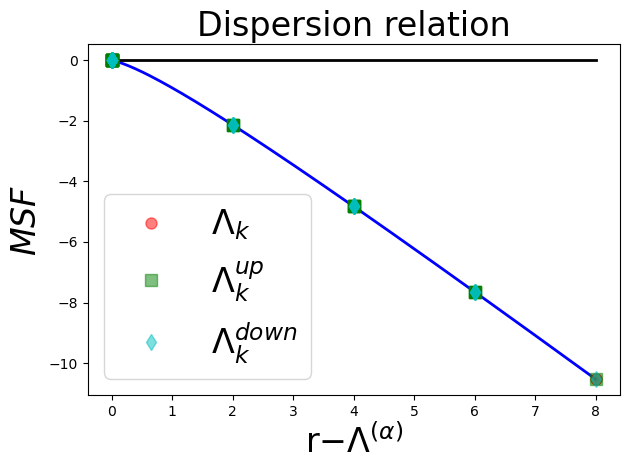

In [3]:
# DISPERSION REALATION
calculate_and_plot_dispersion(config, n)

# Initial Conditions for Integration

Before integrating the system, we need to establish the initial conditions. This step involves setting the initial time, final time, initial wave conditions, and other relevant parameters. These conditions form the basis for our numerical integration.


In [4]:
# INTEGRATION
t_ini, t_final, w_init, Ln = initial_condition(n, config)

# Numerical Integration
Here, we integrate the system of differential equations using the Runge-Kutta 4th order method (`RK45`). This method is widely used for its balance between computational efficiency and accuracy in solving ordinary differential equations. The integration will provide us with the evolution of the system over the specified time range.


In [5]:
# Integrate the system of differential equations with the Runge-Kutta 4 method
sol = solve_ivp(system_to_integrate, [t_ini, t_final], w_init, method='RK45', args=(config, Ln))

# Results Plotting

After integrating the system, the next step is to visualize the results. Plotting the solutions helps in better understanding the dynamics of the system. It also allows for a quick assessment of the behavior of the system under the given conditions.


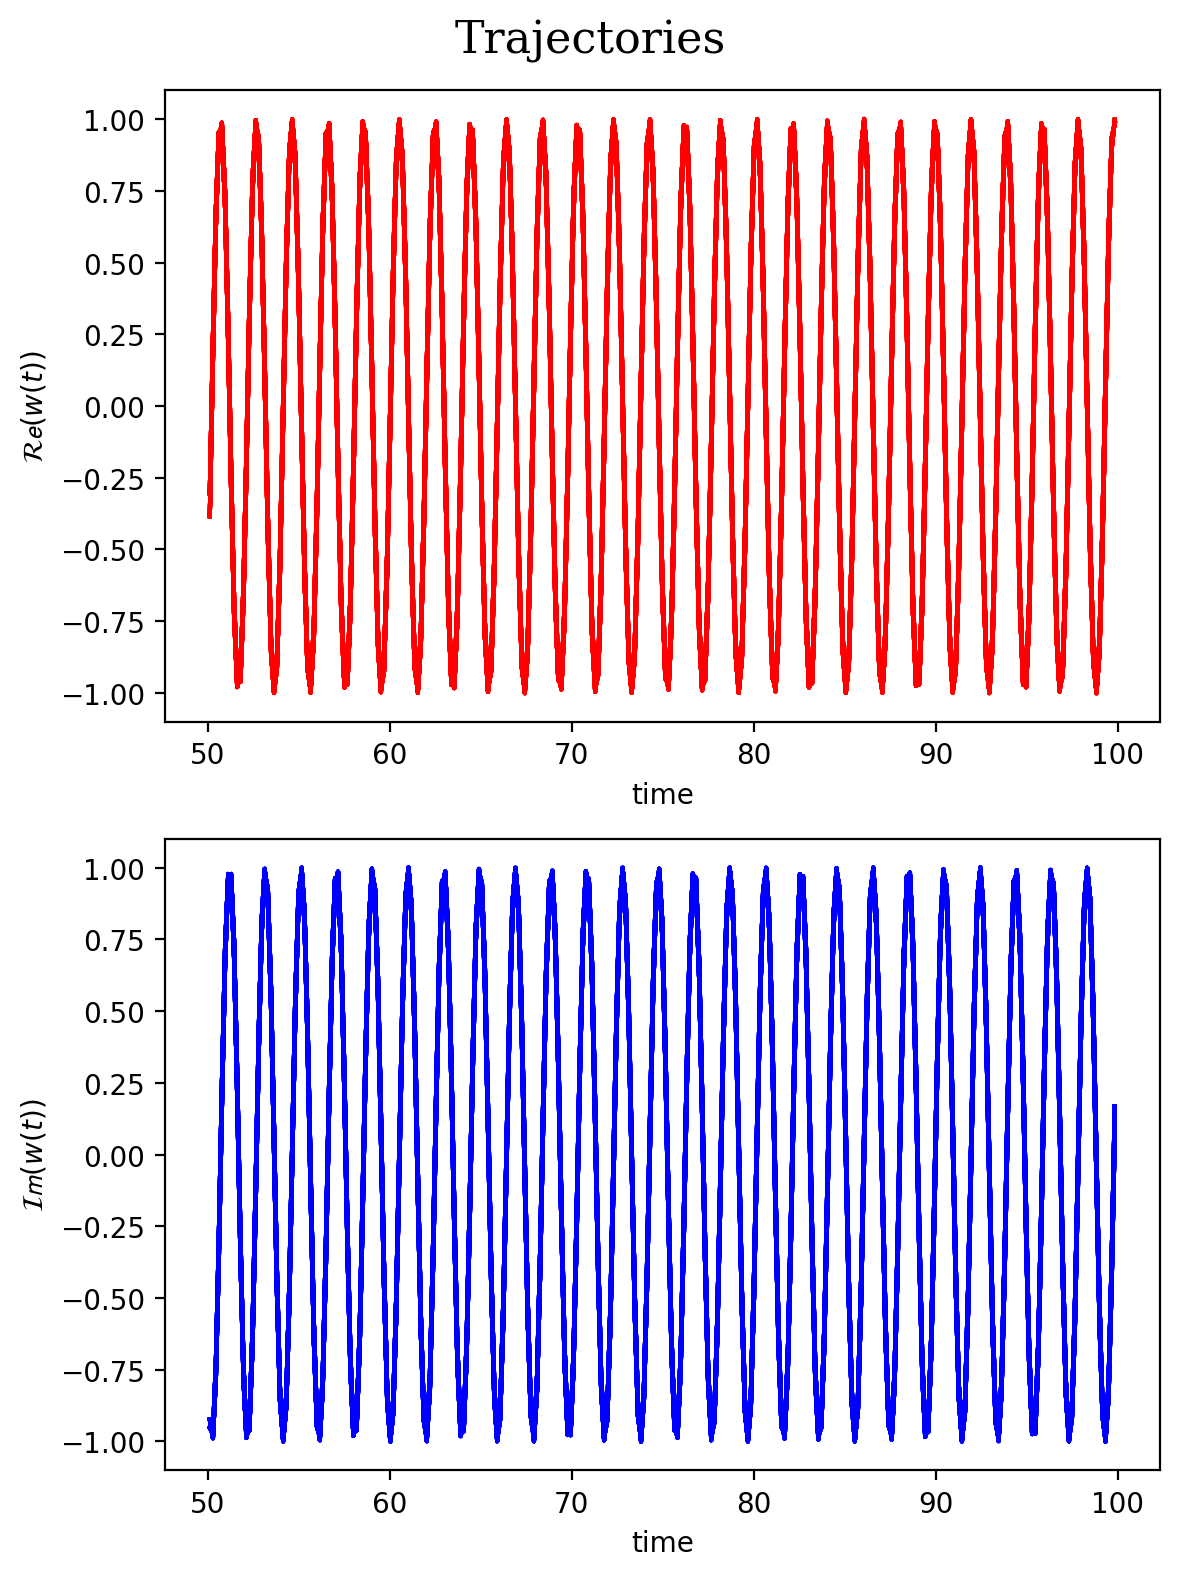

In [6]:
# PLOTTING
plot_trajectories(sol, n, config)

# Order parameter
In the following we calculate the order parameters for the given topological signal. We plot real order parameter as a function of time and the complex order parameter in the complex plane.

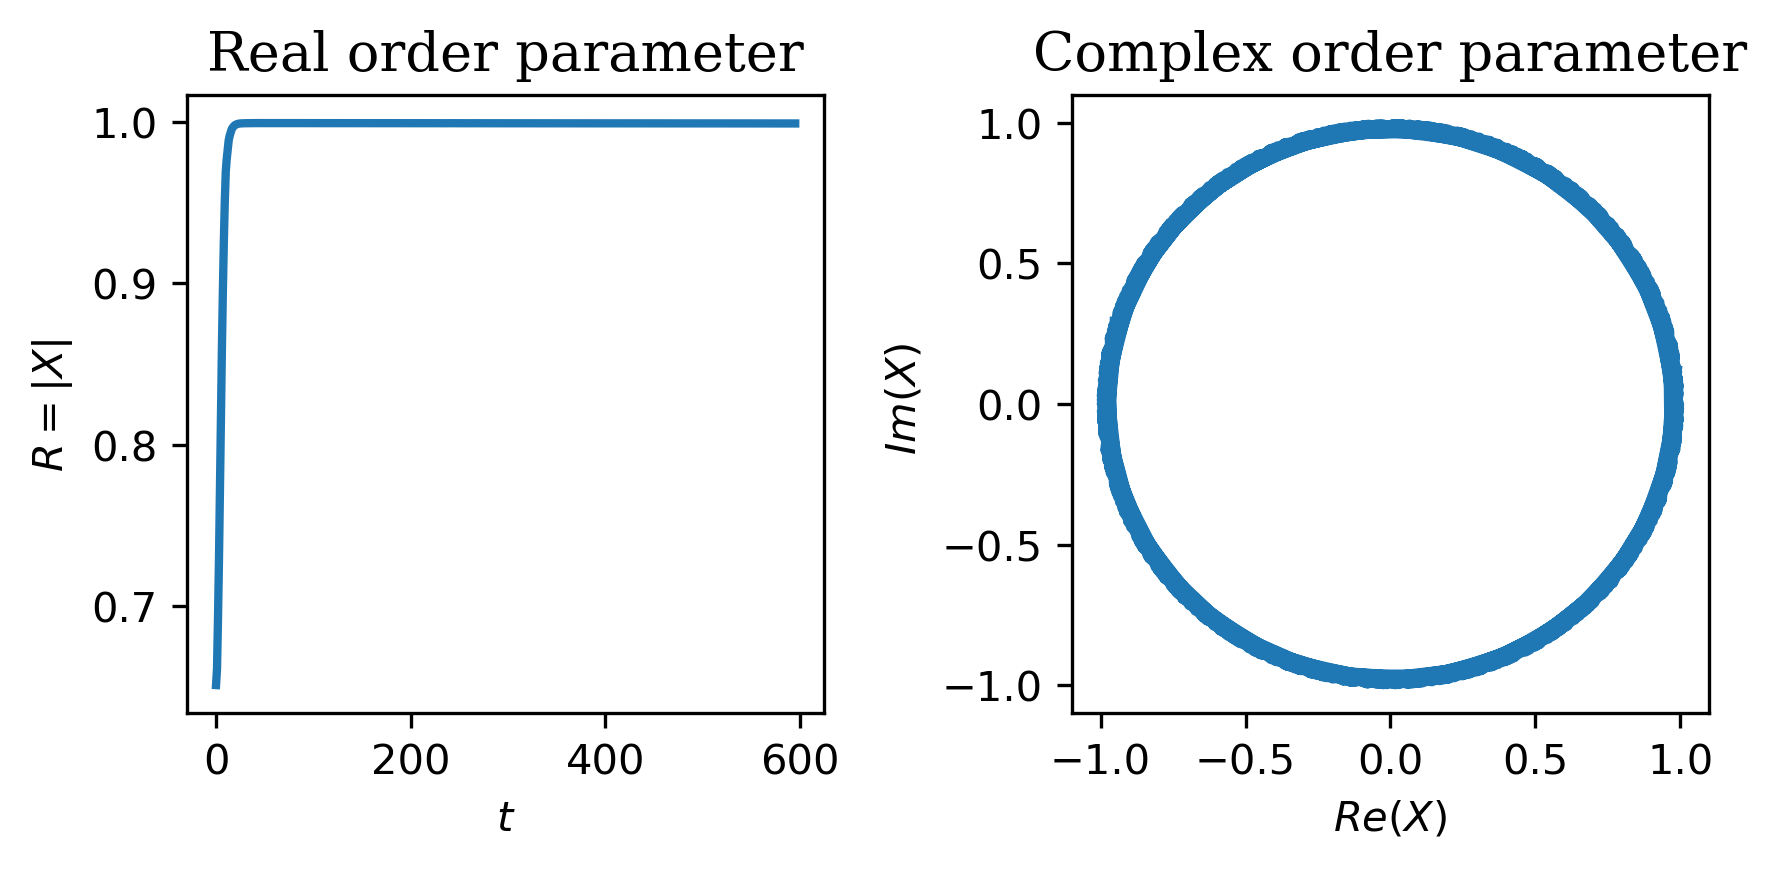

In [7]:
plot_order_parameter(sol)